# CNN for MNIST Handwritten Digit Classification
**Author:** Khai Ta  
**Date:** October 2024

In this project, I implement a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset using PyTorch.



## 1. Importing Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## 2. Loading the MNIST Dataset

We use the `torchvision` library to download and load the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits (0-9). We create training and testing datasets and use `DataLoader` for batching.

In [ ]:
train_data = datasets.MNIST(root='data', train=True, transform=ToTensor(), download=True)
test_data = datasets.MNIST(root='data', train=False, transform=ToTensor(), download=True)

loaders = {
    'train': DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    'test': DataLoader(test_data, batch_size=100, shuffle=False, num_workers=1),
}

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.0MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.37MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.39MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 3. Defining the CNN Model

We define a CNN model that includes two convolutional layers, dropout for regularization, and two fully connected layers for classification. The model uses ReLU activations and outputs log probabilities.

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

## 4. Setting Up the Training Environment

We check if a GPU is available for faster computations. We also define the optimizer (Adam) and the loss function (CrossEntropyLoss).

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

## 5. Training the Model

We implement a training loop where the model is trained for a specified number of epochs. During training, we print the loss every 50 batches to monitor progress.

In [ ]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 50 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} '
                  f'({100. * batch_idx / len(loaders["train"]):.0f}%)]\tLoss: {loss.item():.6f}')

## 6. Testing the Model

After training, we evaluate the model on the test dataset, calculating the average loss and accuracy.

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'])
    accuracy = 100. * correct / len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} '
          f'({accuracy:.0f}%)\n')

## 7. Training and Evaluating the Model

We train the model for 10 epochs and evaluate its performance on the test set after each epoch.

In [ ]:
for epoch in range(1, 11):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300922
Train Epoch: 1 [5000/60000 (8%)]	Loss: 1.352119
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.658842
Train Epoch: 1 [15000/60000 (25%)]	Loss: 0.753340
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.431108
Train Epoch: 1 [25000/60000 (42%)]	Loss: 0.524499
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.446015
Train Epoch: 1 [35000/60000 (58%)]	Loss: 0.328297
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.304909
Train Epoch: 1 [45000/60000 (75%)]	Loss: 0.560231
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.329533
Train Epoch: 1 [55000/60000 (92%)]	Loss: 0.215860

Test set: Average loss: 0.1309, Accuracy: 9592/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.315657
Train Epoch: 2 [5000/60000 (8%)]	Loss: 0.238810
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.263194
Train Epoch: 2 [15000/60000 (25%)]	Loss: 0.408566
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.235147
Train Epoch: 2 [25000/60000 (42%)]	Loss: 0.260243
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.301017
Tra

## 8. Visualizing Predictions

We can visualize the model's predictions on individual test images to assess its performance qualitatively.

Prediction: 0


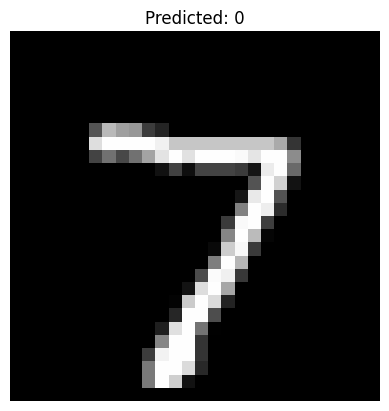

In [ ]:
def predict_single_image(index):
    model.eval()
    data, target = test_data[index]
    data = data.unsqueeze(0).to(device)

    output = model(data)
    prediction = output.argmax(dim=1, keepdim=True).item()
    print(f'Prediction: {prediction}')

    image = data.squeeze(0).squeeze(0).cpu().numpy()
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {prediction}')
    plt.axis('off')
    plt.show()

predict_single_image(0)

## Conclusion

We successfully built and trained a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset. The model achieved an accuracy of approximately 99%, demonstrating the effectiveness of CNNs in image classification tasks.